#### Gradient Descent

Jay Urbain
12/10/2018

[Gradient descent](https://en.wikipedia.org/wiki/Gradient_descent) is an optimization algorithm used to find the local minimum of a function. It is commonly used in many different machine learning algorithms. 

Complete the code for the following functions below:   
- dLdw1() # partial derivative of the loss (cost) with respect to w1
- dLdw0() # partial derivative of the loss (cost) with respect to w0
- f() # linear regression prediction function
- cost() # cost function   

Note: plots

In [34]:
# loading necessary libraries and setting up plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# generate plots within notebook
%matplotlib inline

In [35]:
# Read dataset into a Pandas dataframe
f = "ex1data1.txt"
df = pd.read_csv(f, header=None, names=["X","Y"])

# verify
print(df.shape)
print(df.head())

# Convert pandas columns for X, Y into numpy arrays for processing
X=df.iloc[:,0].values
Y=df.iloc[:,1].values

print(type(X))
print(X.shape)
print(X.shape[0])
print(X[:5])
print(Y[:5])

(97, 2)
        X        Y
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233
<class 'numpy.ndarray'>
(97,)
97
[6.1101 5.5277 8.5186 7.0032 5.8598]
[17.592   9.1302 13.662  11.854   6.8233]


#### Hyperparameter settings

In [36]:
# default settings, you need to determine optimal convergence settings
alpha = 0.01;   # learning rate
tol = 1e-11;    # tolerance to determine convergence
maxiter = 1000; # maximum number of iterations (in case convergence is not reached)
dispiter = 10;   # interval for displaying results during iterations

# track interations
iters = 0;
# parameter initialization
w0 = 0.1;
w1 = 0.3;

In [37]:
# track results for plotting parameter convergence
w0plot = [0.0]*(maxiter+1);
w1plot = [0.0]*(maxiter+1);
tplot  = [0]*(maxiter+1);
cplot  = [0]*(maxiter+1);

w0plot[:5]

[0.0, 0.0, 0.0, 0.0, 0.0]

#### Generate a scatter plot with labels and title to visualize the data

Plot X as a function of Y.

Gradient descent X Y scatter plot


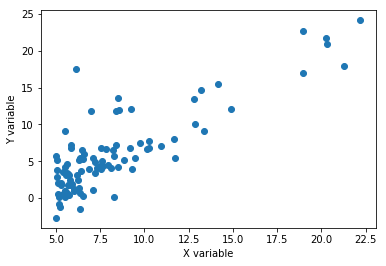

In [38]:
#Scatter plot of X as a function of Y
plt.scatter(X, Y)

#Labels
plt.xlabel('X variable')
plt.ylabel('Y variable')
print('Gradient descent X Y scatter plot')

#### Functions you need to complete !!!

In [39]:
# linear regression predictive function
def f(x):
    return ((w1*X) + w0)
    
# partial derivative of the cost(loss) with respect to w1 (slogpe)
def dLdw1():
    m = X.size
    return ((1/m) * np.sum(X * (f(X) - Y)))
   
    
# partial derivative of the cost(loss) with respect to w0 (slogpe)
def dLdw0():
    m = X.size
    return ((1/m) * np.sum(f(X) - Y))

    
def cost():
    m = X.size
    return ((1/(2 * m)) * (np.sum(Y - f(X)) ** 2))

#### Main training loop

In [40]:
# main algorithm loop starts here
iters = 0
maxiters = 10
while True:
    # Note: need to implement dLdw1 and dLdw0 (above)
    delta1 = alpha * dLdw1()
    delta0 = alpha * dLdw0()

    # Store data for plotting convergence of parameters
    tplot[iters] = iters
    w0plot[iters] = w0
    w1plot[iters] = w1
    cplot[iters] = cost()
 
    iters+=1
    w1 = w1 - delta1
    w0 = w0 - delta0
 
    # display progress
    if iters % dispiter == 0:
        print(str(iters), ", w0=", str(w0), " delta0=", str(delta0), "w1=", str(w1), ", delta1=", str(delta1))

    if abs(delta1) <= tol or abs(delta0) <= tol or iters > maxiter:
        break

print("\nConvergence after " + str(iters) + " iterations: w0=" + str(w0) + ", w1=" + str(w1));

print(cplot)

10 , w0= 0.07657393889906644  delta0= 0.00717347395825889 w1= 0.7939674998994216 , delta1= -0.0007207249153588253
20 , w0= 0.005546496204379646  delta0= 0.007045216099948099 w1= 0.8011029924295502 , delta1= -0.0007077683754222271
30 , w0= -0.06421094621461773  delta0= 0.006919244549949264 w1= 0.8081108841668551 , delta1= -0.0006951131668320883
40 , w0= -0.13272109500616278  delta0= 0.006795525426445593 w1= 0.8149934717301142 , delta1= -0.0006826842389172331
50 , w0= -0.20000625232668678  delta0= 0.006674018455064883 w1= 0.8217529956128491 , delta1= -0.0006704775456780158
60 , w0= -0.26608832156029494  delta0= 0.006554684081558161 w1= 0.8283916562475752 , delta1= -0.0006584891134610069
70 , w0= -0.33098881444898953  delta0= 0.006437483458923742 w1= 0.8349116147221105 , delta1= -0.0006467150396634572
80 , w0= -0.39472885809540326  delta0= 0.006322378434761343 w1= 0.8413149934830766 , delta1= -0.0006351514914630489
90 , w0= -0.4573292018403185  delta0= 0.006209331538852313 w1= 0.847603877

#### Generate scatter plot with linear regression fit line

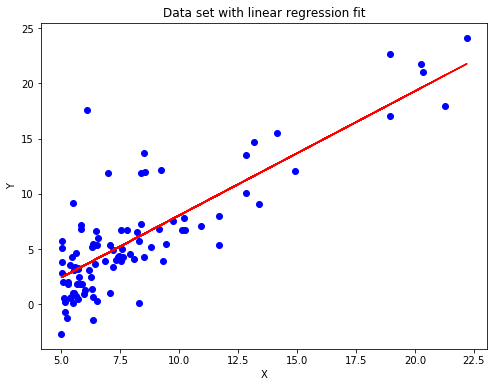

In [41]:
# Adding labels
# Create a Figure object.
fig = plt.figure(figsize=(8, 6))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.
ax.scatter(X, Y, color="blue")
# Add a title.
ax.set_title("Data set with linear regression fit")
# Add axis labels.
ax.set_xlabel("X")
ax.set_ylabel("Y")
# Produce an image.
#fig.savefig("scatterplot.png")
ax.plot(X, w0+w1*X, color="red")

#### Plot convergence of data

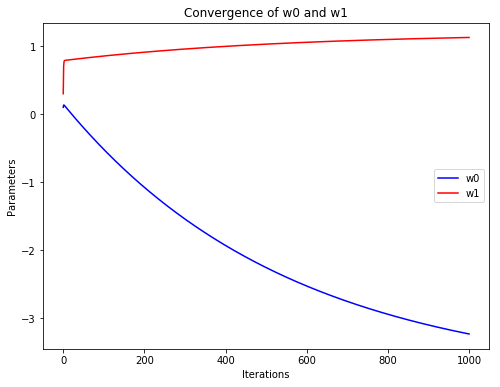

In [42]:
# Adding labels
# Create a Figure object.
fig = plt.figure(figsize=(8, 6))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.    
ax.plot(tplot, w0plot, color="blue", label="w0")
ax.plot(tplot, w1plot, color="red", label="w1")
# Add a title.
ax.set_title("Convergence of w0 and w1")
# Add axis labels.
ax.set_xlabel("Iterations")
ax.set_ylabel("Parameters")
ax.legend(loc='right')

#### Plot convergence of cost function

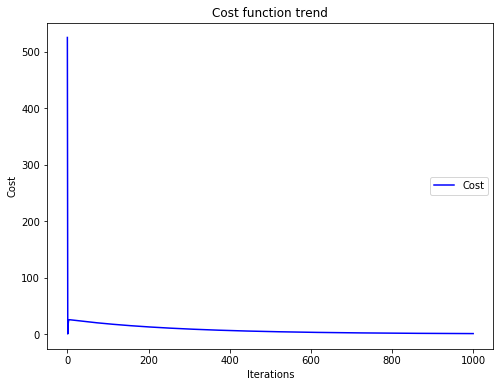

In [43]:
# Adding labels
# Create a Figure object.
fig = plt.figure(figsize=(8, 6))
# Create an Axes object.
ax = fig.add_subplot(1,1,1) # one row, one column, first plot
# Plot the data.    
ax.plot(tplot, cplot, color="blue", label="Cost")
# Add a title.
ax.set_title("Cost function trend")
# Add axis labels.
ax.set_xlabel("Iterations")
ax.set_ylabel("Cost")
ax.legend(loc='right')

Notice how the parameters and the cost function converge at different rates. We could also try terminating our gradient descent algorithm based on the cost function.